# Case 1
Lassi Nurminen   
Last edited: 15.2.2018   
Cognitive Systems for Health Technology Applications   
Helsinki Metropolia University of Applied Sciences   


#  1. Objectives   
Objective of this assignment was to learn to read data from externals sources using panda’s 
and keras.io dense neural networks to make an system to support in
diagnostic decision making.

# 2. Required libraries 

In [18]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense 
from keras import models
from keras import layers 

%matplotlib inline 


In [19]:
print('numpy', np.__version__)

numpy 1.12.1


In [33]:
# Import the data 
filename = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

colnames = ['age', 'sex', 'cp', 'tresbps', 'chol',
           'fbs', 'restecg', 'thalac', 'exang', 'oldpeak',
           'slope', 'ca', 'thal', 'num']

df = pd.read_csv(filename,
                 names = colnames,
                 na_values = '?')

df.head()


,age,sex,cp,tresbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [21]:
# Descriptive statistics

df.describe()

,age,sex,cp,tresbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [22]:
np.sum(np.isnan(df))

age        0
sex        0
cp         0
tresbps    0
chol       0
fbs        0
restecg    0
thalac     0
exang      0
oldpeak    0
slope      0
ca         4
thal       2
num        0
dtype: int64

In [23]:
# Missing values 
# df = df.fillna(0)
df = df.where(~np.isnan(df), df.mean(), axis = 'columns')

In [24]:
df.shape

(303, 14)

In [25]:
# Calculate the outputs
# 0 = healthy, 1 = disease
labels = (df['num'] > 0).values

In [26]:
# Input data
columns = ['age', 'sex', 'cp', 'tresbps', 'chol',
           'fbs', 'restecg', 'thalac', 'exang', 'oldpeak',
           'slope', 'ca', 'thal']

data = df[columns].values

In [27]:
data.shape

(303, 13)

In [28]:
# Scale the data 
min_max_scaler = preprocessing.MinMaxScaler()
# new_data = k*data +b
data_scaled = min_max_scaler.fit_transform(data)


In [29]:
min_max_scaler.scale_, min_max_scaler.min_

(array([ 0.02083333,  1.        ,  0.33333333,  0.00943396,  0.00228311,
         1.        ,  0.5       ,  0.00763359,  1.        ,  0.16129032,
         0.5       ,  0.33333333,  0.25      ]),
 array([-0.60416667,  0.        , -0.33333333, -0.88679245, -0.28767123,
         0.        ,  0.        , -0.54198473,  0.        ,  0.        ,
        -0.5       ,  0.        , -0.75      ]))

In [30]:
# Split the data into training and validation sets

x_train, x_test, y_train, y_test = train_test_split(data_scaled, labels, test_size = 0.36)

In [31]:
# Create the NN model and train it 

model = Sequential()
model.add(Dense(64, activation = 'relu', input_dim = 13))
model.add(Dense(65, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
             metrics = ['accuracy'])

N = 100 # number of epochs
h = model.fit(x_train, y_train, verbose = 0, epochs = N,
             batch_size = 128,
             validation_data=(x_test, y_test))

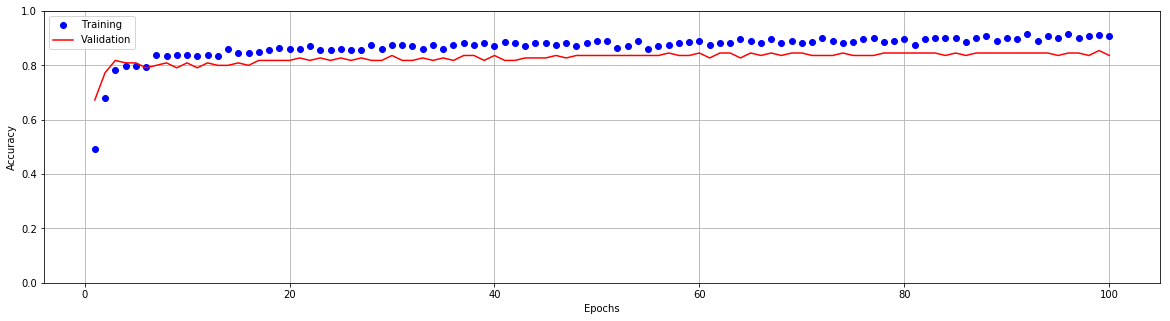

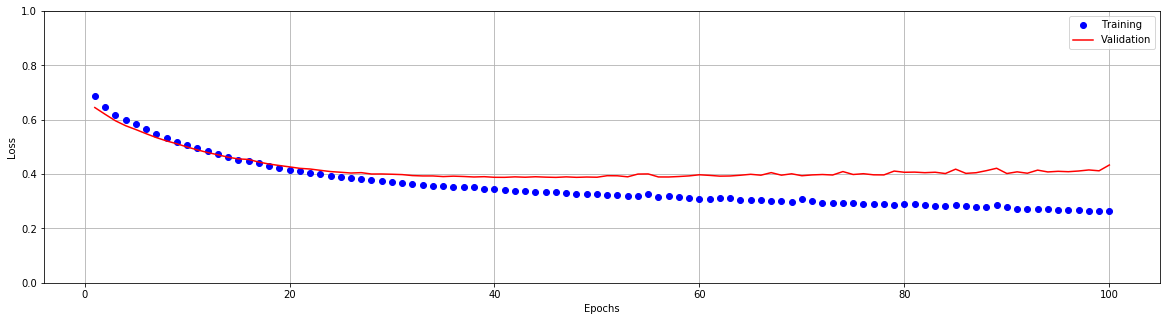

110/110 [==============================] - 0s 142us/step


[0.43344387412071228, 0.83636361360549927]

In [32]:
# Plot the results 

epochs = range(1, N +1)
acc = h.history['acc']
val_acc = h.history['val_acc']
loss = h.history['loss']
val_loss = h.history['val_loss']

#Accuracy plot

plt.figure(figsize = (20, 5))
plt.plot(epochs, acc, 'bo', label = 'Training')
plt.plot(epochs, val_acc, 'r-', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.show()


# Loss plot

plt.figure(figsize = (20, 5))
plt.plot(epochs, loss, 'bo', label = 'Training')
plt.plot(epochs, val_loss, 'r-', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.show()

score = model.evaluate(x_test, y_test, batch_size = 128)
score


